# Haar Wavelet transform

In [13]:
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import requests
import numpy as np
import skimage
import math

monroe = 'https://pp.userapi.com/c849228/v849228160/c58dc/ns7Dp93aWuQ.jpg'
vanya = 'https://pp.userapi.com/c852320/v852320876/6b292/XPADVjsIX6o.jpg' 
surriken = 'https://pp.userapi.com/c850132/v850132395/99040/GRr1gQvCx2w.jpg'

### Function of Haar Wavelet

In [14]:
def HaarWavelet(image):

    image = image.astype(np.float)
    h, w = image.shape[0], image.shape[1] 
    if (len(image.shape)) == 3: 
        transformed_image = np.zeros((h, w, 3), np.float)
    else:
        transformed_image = np.zeros((h, w), np.float)

    for i in range(h):
        for j in range(0, w-1, 2):
            new_width = math.floor(w/2 + math.floor(j/2))
            transformed_image[i, math.floor(j/2)] = (image[i, j] + image[i, math.floor(j+1)])/2
            transformed_image[i, new_width] = (image[i, j] - image[i, math.floor(j+1)])/2

    image = np.copy(transformed_image)
    for i in range(0, h-1, 2):
        for j in range(0, w):
            new_height = math.floor(h/2 + math.floor(i / 2))
            transformed_image[math.floor(i/2), j] = (image[i, j] + image[math.floor(i+1), j])/2
            transformed_image[new_height, j] = (image[i, j] - image[math.floor(i+1), j])/2
            
    trans = transformed_image.astype(np.float)
    return  trans


In [15]:
def InverseHaarWavelet(image):
    
    image = image.astype(np.float)
    h, w = image.shape[0], image.shape[1]
    if (len(image.shape)) == 3: 
        inverse_image = np.zeros((h, w, 3), np.float)
    else:
        inverse_image = np.zeros((h, w), np.float)

    for i in range(0, h-1, 2):
        for j in range(0, w):
            inverse_image[i, j] = ((image[math.floor(i/2), j]/2) + (image[math.floor(h/2 + math.floor(i/2)), j]/2))*2
            inverse_image[math.floor(i + 1), j] = ((image[math.floor(i/2), j] / 2) - (image[math.floor(h/2 + math.floor(i/2)), j]/2))*2

   
    image = np.copy(inverse_image)
    for i in range(0, h):
        for j in range(0, w - 1, 2):
            inverse_image[i, j] = ((image[i,math.floor(j / 2)] / 2) + (image[i, math.floor(math.floor(j / 2) + w/2)] / 2))*2
            inverse_image[i, math.floor(j + 1)] = ((image[i, math.floor(j / 2)] / 2) - (image[i, math.floor(math.floor(j/2) + w/2)] / 2))*2
    inv = inverse_image.astype(np.float)
    return inv

## Numerical experiments

### Haar transform of the image

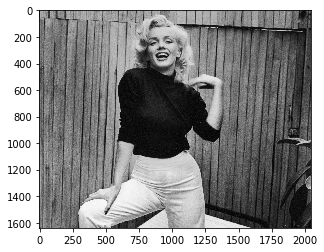

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


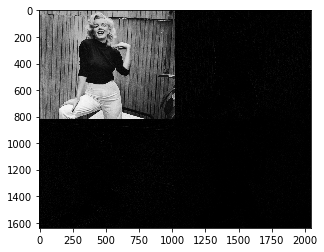

In [16]:
monroe_face = Image.open(requests.get(monroe, stream=True).raw)
monroe_face = skimage.img_as_float(monroe_face)
plt.imshow(monroe_face)
plt.show()
plt.imshow(HaarWavelet(monroe_face))
plt.show()

### Loseless Compression

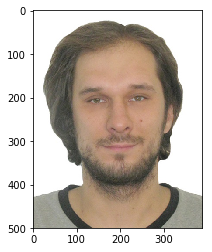

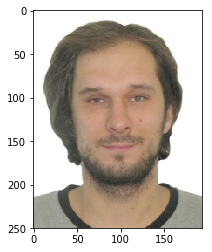

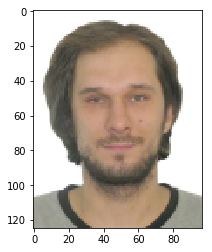

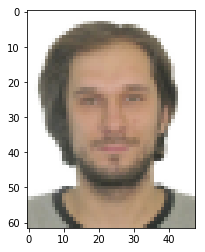

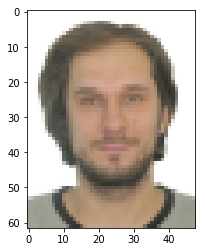

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


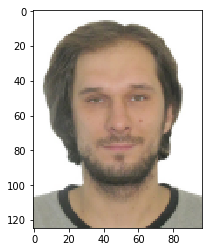

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


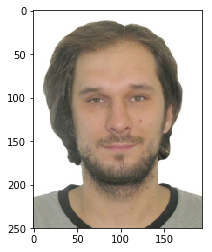

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


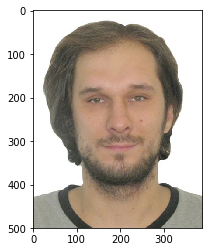

In [17]:
vanya_face = Image.open(requests.get(vanya, stream=True).raw)
vanya_face = skimage.img_as_float(vanya_face)
for i in range(4):
    plt.imshow(vanya_face[:int(vanya_face.shape[0]/2**(i)),:int(vanya_face.shape[1]/2**(i))])
    plt.show()
    vanya_face=HaarWavelet(vanya_face)
for i in range(4):
    vanya_face=InverseHaarWavelet(vanya_face)
    plt.imshow(vanya_face[:int(vanya_face.shape[0]/2**(3-i)),:int(vanya_face.shape[1]/2**(3-i))])
    plt.show()

### Dropping Residuals

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


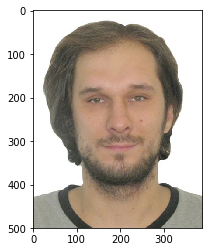

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


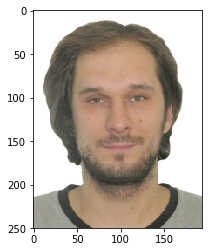

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


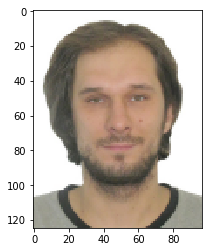

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


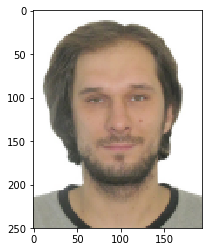

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


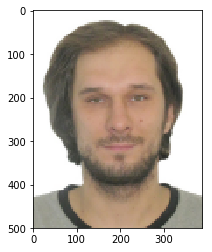

In [18]:
img=np.copy(vanya_face)
plt.imshow(vanya_face)
plt.show()

img=HaarWavelet(img)
plt.imshow(img[:int(vanya_face.shape[0]/2),:int(img.shape[1]/2)])
img[:,int(389/2):] = 0
img[int(500/2):,:] = 0
plt.show()

img=HaarWavelet(img)
plt.imshow(img[:int(vanya_face.shape[0]/4),:int(img.shape[1]/4)])
img[:,int(389/4):] = 0
img[int(500/4):,:] = 0
plt.show()

img=InverseHaarWavelet(img)
plt.imshow(img[:int(vanya_face.shape[0]/2),:int(img.shape[1]/2)])
plt.show()

img=InverseHaarWavelet(img)
plt.imshow(img[:int(vanya_face.shape[0]),:int(img.shape[1])])
plt.show()

### Edge detection

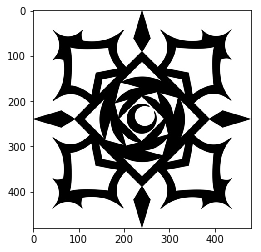

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


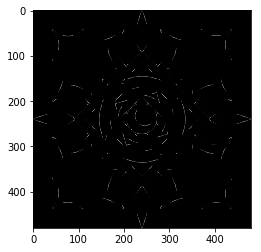

In [20]:
img_surriken = Image.open(requests.get(surriken, stream=True).raw)
img_surriken = skimage.img_as_float(img_surriken)
img=np.copy(img_surriken)
plt.imshow(img)
plt.show()
for i in range(3):
    img=HaarWavelet(img)
    img[:int(img.shape[0]/2**(i+1)),:int(img.shape[1]/2**(i+1))] = 0
for i in range(3):
    img=InverseHaarWavelet(img)
plt.imshow(img)
plt.show()

# Watermark embedding and extracting processes

In [3]:
import numpy as np
from PIL import Image
from skimage import img_as_float
import math
import matplotlib.pyplot as plt
import cv2
from sklearn.metrics import mean_squared_error

coeff = 0.1

In [4]:
def PSNR(img1, img2):
    MSE = mean_squared_error(img1,img2)
    if MSE == 0:
        return 100
    return 20 * math.log10(255.0/ math.sqrt(MSE))

In [5]:
def NCC(img1, img2):
    img1[img1<0]=0
    img2[img2<0]=0
    return np.sum(np.multiply(img1,img2))/np.sqrt(np.sum(img1))/np.sqrt(np.sum(img2))/255.0

### Watermark embedding and extracting functions

In [6]:
def watermark_embedding (image,watermark,coeff):
    
    #1-DWT transformation of the image and watermark
    DWT_img=HaarWavelet(image)
    LL_img=DWT_img[:int(DWT_img.shape[0]/2),:int(DWT_img.shape[1]/2)]
    DWT_watermark=HaarWavelet(watermark)
    LL_watermark=DWT_watermark[:int(DWT_watermark.shape[0]/2),:int(DWT_watermark.shape[1]/2)]
    
    #SVD of LL parts of the image and watermark
    U_image,S_img,V_image=np.linalg.svd(LL_img)
    _,S_watermark,_=np.linalg.svd(LL_watermark)
    
    #embedding_function
    S_img_watermarked=S_img+coeff*S_watermark*S_img.max()/S_watermark.max()
    
    #obtaining watermarked LL
    wat_LL=U_image.dot(np.diag(S_img_watermarked).dot(V_image))
    
    #creating watermarked image by DWT inverse transform
    DWT_img[:int(DWT_img.shape[0]/2),:int(DWT_img.shape[1]/2)]=wat_LL
    result_image=InverseHaarWavelet(DWT_img)

    return result_image

In [7]:
def watermark_exracting(img_watermark,image,orig_watermark,coeff):
    
    #1-DWT transformation of the watermarked image and original image
    DWT_img=HaarWavelet(image)
    LL_img=DWT_img[:int(DWT_img.shape[0]/2),:int(DWT_img.shape[1]/2)]
    DWT_watermark=HaarWavelet(orig_watermark)
    LL_watermark=DWT_watermark[:int(DWT_watermark.shape[0]/2),:int(DWT_watermark.shape[1]/2)]
    DWT_img_watermark=HaarWavelet(img_watermark)
    LL_img_watermark=DWT_img_watermark[:int(DWT_img_watermark.shape[0]/2),:int(DWT_img_watermark.shape[1]/2)]
    
    #SVD of LL parts of the image and watermarked image
    _,S_img,_=np.linalg.svd(LL_img)
    _,S_img_watermark,_=np.linalg.svd(LL_img_watermark)
    U_watermark,S_wat,V_watermark=np.linalg.svd(LL_watermark)

    #Extracting function
    S_watermark=(S_img_watermark-S_img)/coeff/S_img.max()*S_wat.max()  
    
    #obtaining extracted LL
    LL_img_watermark=U_watermark.dot(np.diag(S_watermark).dot(V_watermark))
    
    #creating extracted watermark
    DWT_watermark[:int(DWT_img_watermark.shape[0]/2),:int(DWT_img_watermark.shape[1]/2)]=LL_img_watermark
    result_watermark=InverseHaarWavelet(DWT_watermark)
    
    return result_watermark
    

## Numerical experiments

### Creating watermarked image

Original image


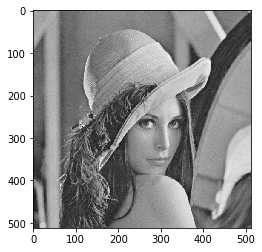

Watermark


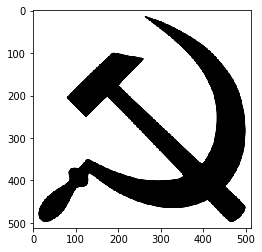

Watermarked image


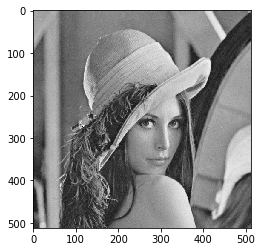

Extracted watermark


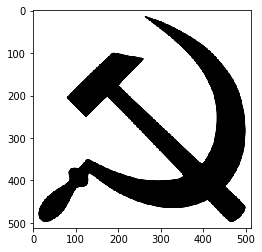

In [8]:
img=cv2.imread('lena.jpg',0)
print ('Original image')
plt.imshow(img, cmap='gray')
plt.show()
watermark=cv2.imread('watermark.jpg',0)
print ('Watermark')
plt.imshow(watermark, cmap='gray')
plt.show()
img_watermarked=watermark_embedding(img,watermark,coeff)
print ('Watermarked image')
plt.imshow(img_watermarked, cmap='gray')
plt.show()
cv2.imwrite('watermarked_lena.jpg', img_watermarked)
img1=watermark_exracting(img_watermarked,img,watermark,coeff)
cv2.imwrite('watermark_extracted.jpg', img1)
print ('Extracted watermark')
plt.imshow(img1, cmap='gray')
plt.show()

### Extracting watermarks from images with various distortions

In [9]:
lenas=["0_9pix","contrast_-20","crop_400","gamma_correction_0_6","histogram_equalization","noise_5_proc","pixelate_2","rotate_20"]

In [10]:
rmses=[]
psnrs=[]
nccs=[]
img1[img1<0]=0
print('File suffix; RMSE; PSNR; NCC')
for lena in lenas:
    img_watermarked=cv2.imread('watermarked_lena_'+lena+'.jpg',0)
    img2=watermark_exracting(img_watermarked,img,watermark,coeff)
    img2[img2<0]=0
    cv2.imwrite('watermark_extracted_'+lena+'.jpg', img2)
    rmse=np.sqrt(mean_squared_error(img1,img2))
    psnr=PSNR(img1,img2)
    ncc=NCC(img1,img2)
    print(lena,'; RMSE = ', rmse, ';PSNR = ', psnr, '; NCC = ', ncc)
    rmses.append(rmse)
    psnrs.append(psnr)
    nccs.append(ncc)

File suffix; RMSE; PSNR; NCC
0_9pix ; RMSE =  49.94310382359404 ;PSNR =  14.16129302795905 ; NCC =  0.9574313512235496
contrast_-20 ; RMSE =  41.364098003052845 ;PSNR =  15.798332440254901 ; NCC =  0.8880124654752224
crop_400 ; RMSE =  214.12639630700525 ;PSNR =  1.517399448792098 ; NCC =  0.04940380757351677
gamma_correction_0_6 ; RMSE =  210.3490415640824 ;PSNR =  1.6719928579799657 ; NCC =  0.1659235293481994
histogram_equalization ; RMSE =  117.73198139183266 ;PSNR =  6.712914546315875 ; NCC =  0.9061440161740114
noise_5_proc ; RMSE =  20.182451410466218 ;PSNR =  22.031325296945514 ; NCC =  0.9933879989160188
pixelate_2 ; RMSE =  2.101936289563893 ;PSNR =  41.678412643247256 ; NCC =  0.998399138353935
rotate_20 ; RMSE =  138.49905370648935 ;PSNR =  5.301867486728082 ; NCC =  0.7586516124663859


### Extracting watermarks from images with Gauss Blur distortions

In [11]:
lenas_gauss=["0_9pix","1_2pix","1_5pix","1_8pix","2_7pix","3_6pix","4_2pix","5_1pix","6_0pix","6_6pix","7_2pix","10_0pix","25_0pix","50_0pix","100_0pix","1000_0pix"]

In [12]:
rmses_gauss=[]
psnrs_gauss=[]
nccs_gauss=[]
img1[img1<0]=0
for lena in lenas_gauss:
    img_watermarked=cv2.imread('watermarked_lena_'+lena+'.jpg',0)
    img2=watermark_exracting(img_watermarked,img,watermark,coeff)
    img2[img2<0]=0
    cv2.imwrite('watermark_extracted_'+lena+'.jpg', img2)
    rmse=np.sqrt(mean_squared_error(img1,img2))
    psnr=PSNR(img1,img2)
    ncc=NCC(img1,img2)
    print(lena,'; RMSE = ', rmse, ';PSNR = ', psnr, '; NCC = ', ncc)
    rmses_gauss.append(rmse)
    psnrs_gauss.append(psnr)
    nccs_gauss.append(ncc)

0_9pix ; RMSE =  49.94310382359404 ;PSNR =  14.16129302795905 ; NCC =  0.9574313512235496
1_2pix ; RMSE =  62.81802067379198 ;PSNR =  12.169118645873374 ; NCC =  0.944660770848031
1_5pix ; RMSE =  91.18059508938977 ;PSNR =  8.932755162789308 ; NCC =  0.9120641101169076
1_8pix ; RMSE =  85.35056327379873 ;PSNR =  9.506675776665725 ; NCC =  0.9191112299299957
2_7pix ; RMSE =  112.15217248578703 ;PSNR =  7.134649795381661 ; NCC =  0.8708038622697992
3_6pix ; RMSE =  133.37264836010795 ;PSNR =  5.629468109154329 ; NCC =  0.8400105634124858
4_2pix ; RMSE =  150.45472671512877 ;PSNR =  4.5826868852625005 ; NCC =  0.815559405929294
5_1pix ; RMSE =  170.1752545708535 ;PSNR =  3.5128754296239224 ; NCC =  0.7843703567158425
6_0pix ; RMSE =  187.0280308386431 ;PSNR =  2.6926695820948137 ; NCC =  0.749017841753958
6_6pix ; RMSE =  194.0928184674377 ;PSNR =  2.3706142772810526 ; NCC =  0.7341305379033866
7_2pix ; RMSE =  204.8638354523248 ;PSNR =  1.901497622666672 ; NCC =  0.719159557353145
10_0pi